# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

In [2]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)


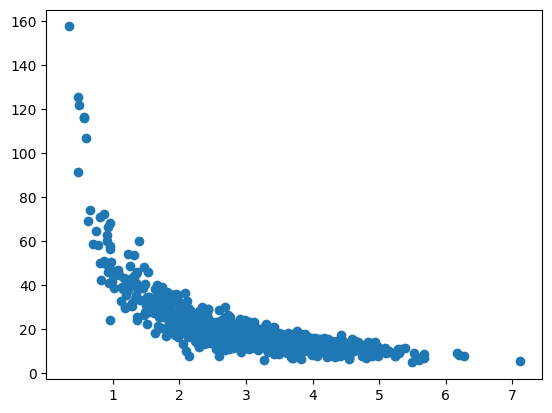

In [3]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [4]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)




In [5]:
p4 = np.poly1d(np.polyfit(x, y, 4))

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

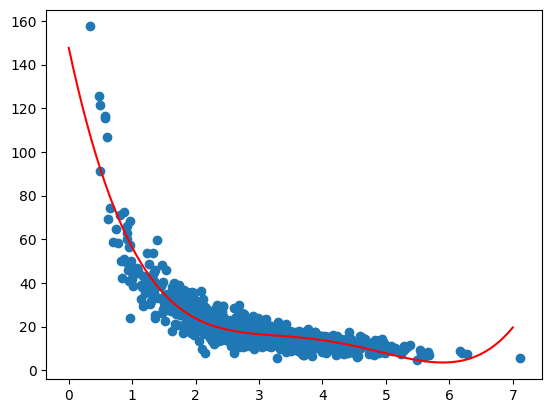

In [6]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303072


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

# np.random.seed(2)
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds


In [21]:
def plot_fit(dim, 
             x=np.array(pageSpeeds), 
             y=np.array(purchaseAmount)
             ):
  p4 = np.poly1d(np.polyfit(x, y, dim))
  xp = np.linspace(0, 7, 100)
  plt.scatter(x, y)
  plt.plot(xp, p4(xp), c='r')
  plt.show()
  r2 = r2_score(y, p4(x))
  print(f'{dim=},{r2=}')
  return r2

In [26]:
#declare an array from 4 to 14 
arr_dims = [ dim for dim in range(4, 15)]


In [27]:
arr_dims

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [31]:
len(arr_dims)

11

In [33]:
import pandas as pd
df = pd.DataFrame(arr_dims, columns=['dim'])

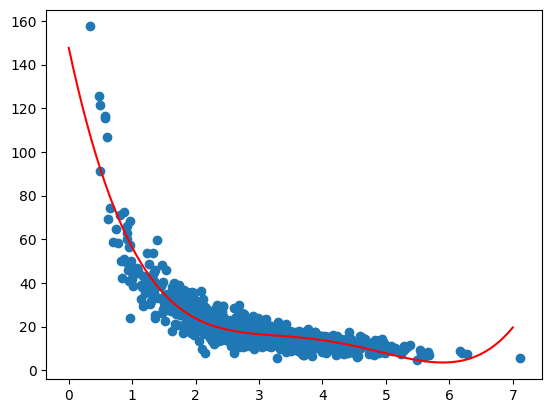

dim=4,r2=0.8293766396303072


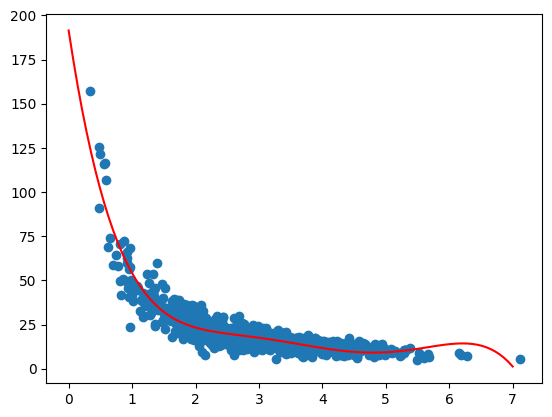

dim=5,r2=0.8553884386186102


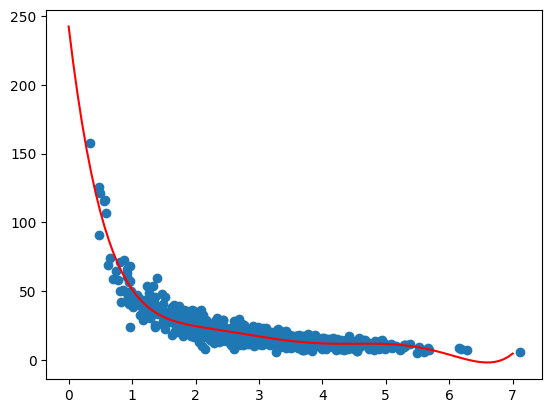

dim=6,r2=0.8700733999871759


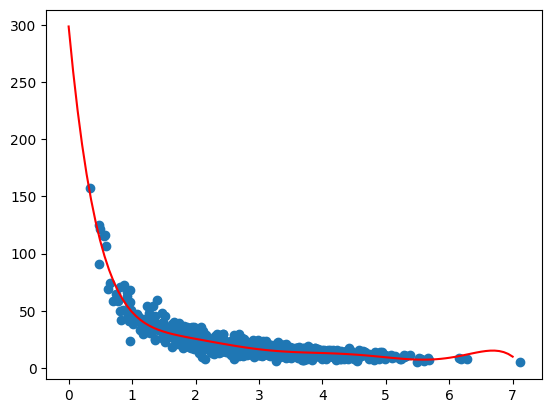

dim=7,r2=0.8778369781712093


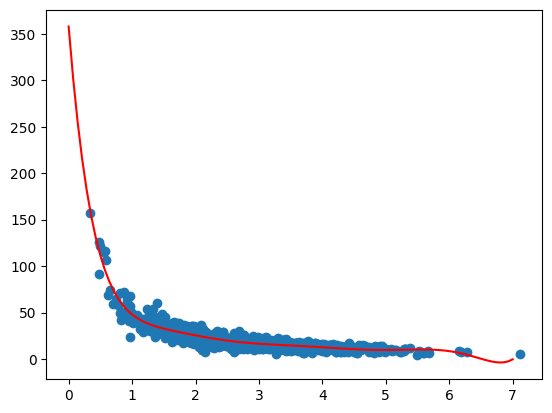

dim=8,r2=0.8814395663681494


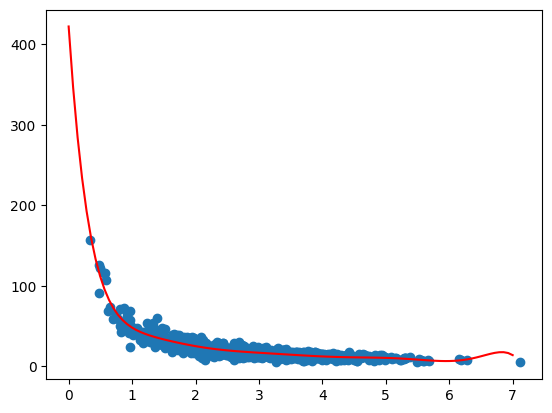

dim=9,r2=0.8830263256615943


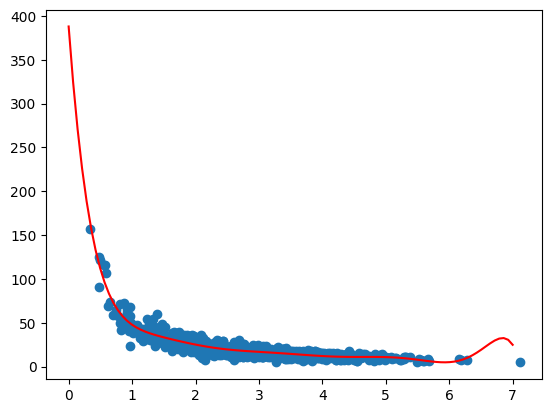

dim=10,r2=0.8832172356257243


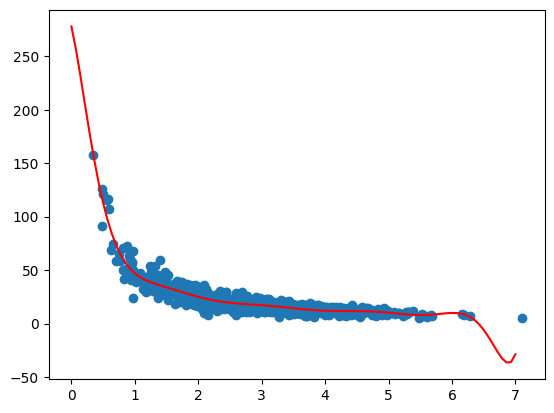

dim=11,r2=0.8841015600010372


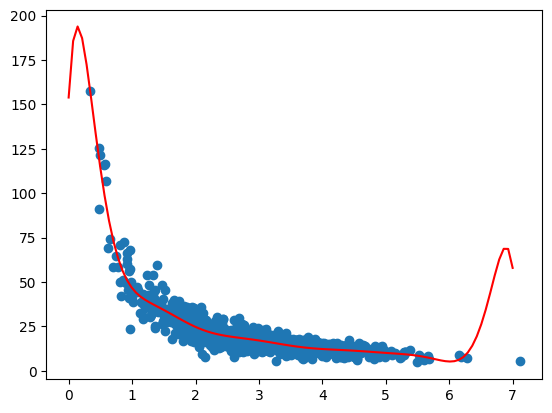

dim=12,r2=0.8846312464750232


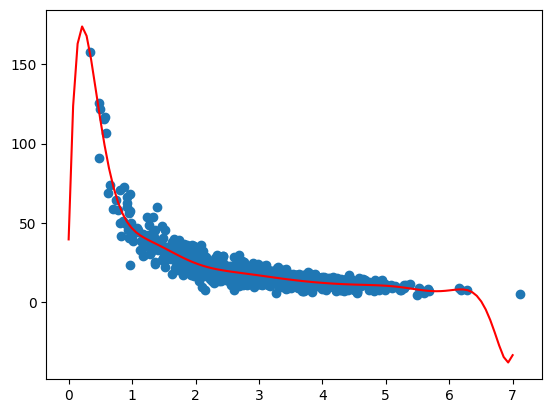

dim=13,r2=0.8848142117965064


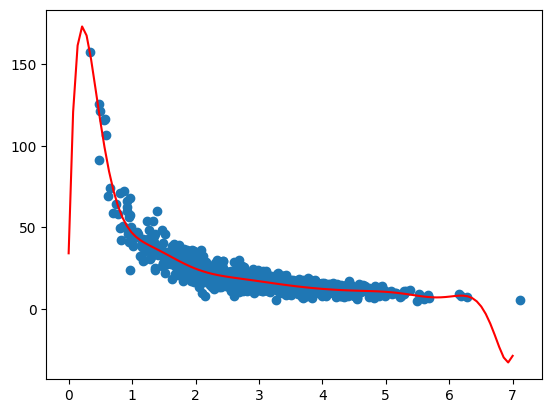

dim=14,r2=0.8848143660171426


In [37]:
# loop dim from 4 to 9
arr_r2 = []
for i in range(len(arr_dims)):
  _dim = arr_dims[i]
  _r2 = plot_fit(_dim)
  arr_r2.append(_r2)
  # assign new vector "r2" to df
  # df['r2'].iloc[i] = _r2
  
df['r2'] = arr_r2

In [38]:
df

,dim,r2
0,4,0.829377
1,5,0.855388
2,6,0.870073
3,7,0.877837
4,8,0.881440
5,9,0.883026
6,10,0.883217
7,11,0.884102
8,12,0.884631
9,13,0.884814


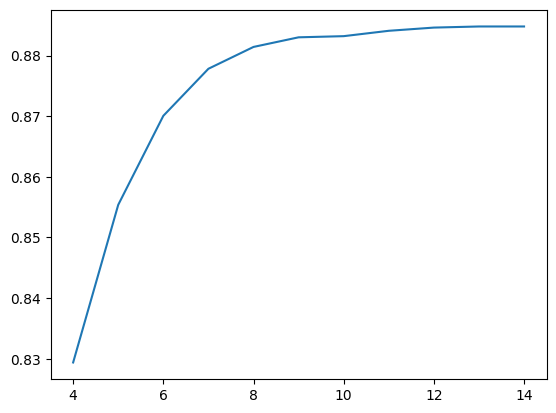

In [39]:
# plot r2 vs dim
plt.plot(df['dim'], df['r2'])